In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
from teyssier import cons_to_prim, weno

In [2]:
T = 0.245
N = 100
CFL = 0.8
p = 0
riemann_solver = "hllc"

In [3]:
jp_sim = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=p,
    CFL=CFL,
    riemann_solver="hllct",
    lazy_primitives=True,
)
jp_sim.run(T, allow_overshoot=True)

 99%|█████████▉| 0.24290026812511104/0.245 [00:00] /Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
101%|██████████| 0.24654766500279954/0.245 [00:00]/Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
101%|██████████| 0.24654766500279954/0.245 [00:00]


In [4]:
_, ut = weno(
    tend=T,
    n=N,
    cfl=CFL,
    ic_type="sod test",
    bc_type="free",
    riemann_solver=riemann_solver,
    time=p + 1,
    space=p + 1,
)

x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

cell= 100  itermax= 100000
Done  66 0.24654766500279954


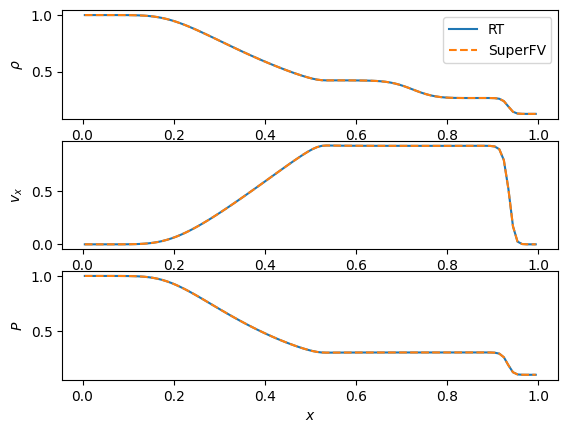

In [5]:
fig, axs = plt.subplots(3, 1)

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(x, wt[0], label="RT")
axs[1].plot(x, wt[1], label="RT")
axs[2].plot(x, wt[2], label="RT")

vis.plot_1d_slice(jp_sim, axs[0], "rho", linestyle="--", label="SuperFV")
vis.plot_1d_slice(jp_sim, axs[1], "vx", linestyle="--", label="SuperFV")
vis.plot_1d_slice(jp_sim, axs[2], "P", linestyle="--", label="SuperFV", xlabel=True)

axs[0].legend()